In [22]:
import pandas as pd
import math as math
import time
import requests
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy
import json
import requests as req
import random
import seaborn as sns

In [7]:
output_data_file = "output_data/cities.csv"

In [8]:
lat_range = (-90, 90)
lng_range = (-180, 180)

In [15]:
latitude = []
longitude = []

for each_lat in np.random.randint(-90,90,2000):
    latitude.append(each_lat)

for each_lon in np.random.randint(-180,180,2000):
    longitude.append(each_lon)
    
    latitude_and_Longitude = tuple(zip(latitude,longitude))

In [25]:
lat_lngs = []
cities = []

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
if city not in cities:
        cities.append(city)     

In [19]:
cities = []
country = []

for lat,lon in latitude_and_Longitude:
    city = citipy.nearest_city(lat,lon)
    
    cityName = city.city_name
    
    cities.append(cityName)
    
    country.append(city.country_code)

print('{} different cities using random numbers.'.format(len(set(cities))))

749 different cities using random numbers.


In [20]:
df_countries = pd.DataFrame({'Cities': cities,
              'Country': country})


df_countries['Latitude'] = ''
df_countries['Longitude'] = ''
df_countries['Temperature (F)'] = ''
df_countries['Humidity (%)'] = ''
df_countries['Cloudiness (%)'] = ''
df_countries['Wind Speed (mph)'] = ''


df_countries = df_countries.drop_duplicates(subset=['Cities'],keep='first')


api_key = "5be78fade1727ace968b5ab363d997bd"

In [23]:
for index,row in df_countries.iterrows():
    city_name = row['Cities']
    Country_id = row['Country']
    
    
    #api call for all Cities 
    api_url = "http://api.openweathermap.org/data/2.5/forecast" \
    "?q={},{}&units=IMPERIAL&mode=json&APPID={}".format(city_name,Country_id,api_key)
    
    
    country_info = requests.get(api_url).json()
    
    #print all api url's for each city
    print(api_url)
    
    
    try:
        df_countries.set_value(index,'Latitude',country_info['city']['coord']['lat'])
        df_countries.set_value(index,'Longitude',country_info['city']['coord']['lon'])
        df_countries.set_value(index,'Temperature (F)',country_info['list'][0]['main']['temp'])
        df_countries.set_value(index,'Humidity (%)',country_info['list'][0]['main']['humidity'])
        df_countries.set_value(index,'Cloudiness (%)',country_info['list'][0]['clouds']['all'])
        df_countries.set_value(index,'Wind Speed (mph)',country_info['list'][0]['wind']['speed'])
        
    except KeyError:
        df_countries.set_value(index,'Latitude',np.nan)
        df_countries.set_value(index,'Longitude',np.nan)
        df_countries.set_value(index,'Temperature (F)',np.nan)
        df_countries.set_value(index,'Humidity (%)',np.nan)
        df_countries.set_value(index,'Cloudiness (%)',np.nan)
        df_countries.set_value(index,'Wind Speed (mph)',np.nan)
        
        print('Missing weather information...skip')

http://api.openweathermap.org/data/2.5/forecast?q=homer,us&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd


C:\Users\ctondo\Python\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\ctondo\Python\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\ctondo\Python\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\ctondo\Python\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\ctondo\Python\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\ctondo\Python\lib\site-packages

http://api.openweathermap.org/data/2.5/forecast?q=cap-aux-meules,ca&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=khatanga,ru&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=cayenne,gf&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=vaini,to&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=saleaula,ws&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=vaitupu,wf&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
Missing weather information...skip


C:\Users\ctondo\Python\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\ctondo\Python\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\ctondo\Python\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\ctondo\Python\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\ctondo\Python\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\ctondo\Python\lib\site-packages

http://api.openweathermap.org/data/2.5/forecast?q=sann,pk&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=busselton,au&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=esperance,au&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=byron bay,au&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=port alfred,za&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=mys shmidta,ru&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=yellowknife,ca&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=grimshaw,ca&units=IMPERIA

http://api.openweathermap.org/data/2.5/forecast?q=nikolskoye,ru&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=lanzhou,cn&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=lavrentiya,ru&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=butaritari,ki&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=sao joao da barra,br&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=marsh harbour,bs&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=hobart,au&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=cape town,za&units=IMPERIAL&mode=json&APPID=5be78fa

http://api.openweathermap.org/data/2.5/forecast?q=lorengau,pg&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=ilulissat,gl&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=valladolid,es&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=nizhniy odes,ru&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=vavuniya,lk&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=goderich,sl&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=skegness,gb&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=cherskiy,ru&units=IMPERIAL

http://api.openweathermap.org/data/2.5/forecast?q=jacqueville,ci&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=labutta,mm&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=tunduru,tz&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=constitucion,mx&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=hami,cn&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=harlingen,nl&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=cleveland,us&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/foreca

http://api.openweathermap.org/data/2.5/forecast?q=oleksandrivka,ua&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=verkhnyaya inta,ru&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=taoudenni,ml&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=pangody,ru&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=geraldton,au&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=gao,ml&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=mochicahui,mx&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=yangambi,cd&units=IMPERIAL&mode=json&APPID=5be78fade1727ac

http://api.openweathermap.org/data/2.5/forecast?q=portsmouth,us&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=nizhneyansk,ru&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=nouadhibou,mr&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=keuruu,fi&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=lipin bor,ru&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=korla,cn&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=wanganui,nz&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=tura,ru&units=IMPERIAL&mode=js

http://api.openweathermap.org/data/2.5/forecast?q=tazmalt,dz&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=dingle,ie&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=armacao dos buzios,br&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=guerrero negro,mx&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=lerwick,gb&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=kununurra,au&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=san javier,bo&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=la asuncion,ve&uni

http://api.openweathermap.org/data/2.5/forecast?q=leh,in&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=port hardy,ca&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=martapura,id&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=jalu,ly&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=coquimbo,cl&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=kapit,my&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=kunming,cn&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=saint anthony,ca&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997

http://api.openweathermap.org/data/2.5/forecast?q=ocampo,mx&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=fukuma,jp&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=karaul,ru&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=mitchell,us&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=beringovskiy,ru&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=horta,pt&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=surt,ly&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=mwinilunga,zm&units=IMPERIAL&mode=json&APP

http://api.openweathermap.org/data/2.5/forecast?q=faya,td&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=king city,us&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=doba,td&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=chapais,ca&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=dmitriyevka,ru&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=sept-iles,ca&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=panalingaan,ph&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=bafoulabe,ml&units=IMPERIAL&mode=j

http://api.openweathermap.org/data/2.5/forecast?q=oster,ua&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=torquay,gb&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=kungurtug,ru&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=shimoda,jp&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=bela,pk&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=anchorage,us&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=castanheira de pera,pt&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=kayerkan,ru&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5

http://api.openweathermap.org/data/2.5/forecast?q=tandalti,sd&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=dunmore east,ie&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=malbork,pl&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=tamsweg,at&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=plouzane,fr&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=mangan,in&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=sungairaya,id&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=dawlatabad,af&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5

In [37]:
df_countries['Latitude'] = pd.to_numeric(df_countries['Latitude'])
df_countries['Longitude'] = pd.to_numeric(df_countries['Longitude'])
df_countries['Temperature (F)'] = pd.to_numeric(df_countries['Temperature (F)'])
df_countries['Humidity (%)'] = pd.to_numeric(df_countries['Humidity (%)'])
df_countries['Cloudiness (%)'] = pd.to_numeric(df_countries['Cloudiness (%)'])
df_countries['Wind Speed (mph)'] = pd.to_numeric(df_countries['Wind Speed (mph)'])

df_countries.head()

,Cities,Country,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,homer,us,59.6441,-151.5402,51.30,90.0,100.0,23.44
1,cap-aux-meules,ca,47.3821,-61.8597,59.00,73.0,100.0,54.13
2,khatanga,ru,71.9801,102.4743,47.05,90.0,82.0,16.20
3,cayenne,gf,4.9371,-52.3259,82.15,75.0,100.0,5.14
4,vaini,to,-21.2001,-175.2000,69.26,71.0,0.0,17.00


In [71]:
length_of_original_DF = len(df_countries)
length_after_dropna = len(df_countries.dropna())

missing_weather_info = length_of_original_DF - length_after_dropna

print('The following cities associated with this dataframe, {} cities did not contain weather\
 information. These cities will be\t   dropped from this dataframe.'.format(missing_weather_info))

print('\n')

print("The dataframe used for plotting contains weather information for {} different cities. "\
      .format(len(df_countries.dropna())))

The following cities associated with this dataframe, 0 cities did not contain weather information. These cities will be	   dropped from this dataframe.


The dataframe used for plotting contains weather information for 644 different cities. 


In [67]:
length_of_original_DF = len(df_countries)
length_after_dropna = len(df_countries.dropna())

missing_weather_info = length_of_original_DF - length_after_dropna

print('For the following cities associated with this dataframe, {} cities did not contain weather\
 information. These cities\t   will be dropped from this dataframe.'.format(missing_weather_info))

print('\n')

print("The dataframe used for plotting contains weather information for {} different cities. "\
      .format(len(df_countries.dropna())))

For the following cities associated with this dataframe, 0 cities did not contain weather information. These cities	   will be dropped from this dataframe.


The dataframe used for plotting contains weather information for 644 different cities. 


In [42]:
df_countries = df_countries.dropna()
df_countries.to_csv(path_or_buf='df_countries.csv')


df_countries_table = df_countries.copy()
df_countries_table['Latitude'] = pd.qcut(df_countries['Latitude'],11,precision=0)
cm = sns.light_palette('green',as_cmap=True)

df_countries_table.groupby(['Latitude'])['Temperature (F)'].mean().reset_index().style.background_gradient(cmap=cm)

,Latitude,Temperature (F)
0,"(-56.0, -29.0]",52.8237
1,"(-29.0, -14.0]",65.2966
2,"(-14.0, -3.0]",72.4219
3,"(-3.0, 9.0]",77.7066
4,"(9.0, 20.0]",80.7934
5,"(20.0, 32.0]",79.4134
6,"(32.0, 40.0]",74.779
7,"(40.0, 48.0]",64.169
8,"(48.0, 55.0]",53.729
9,"(55.0, 64.0]",50.1816


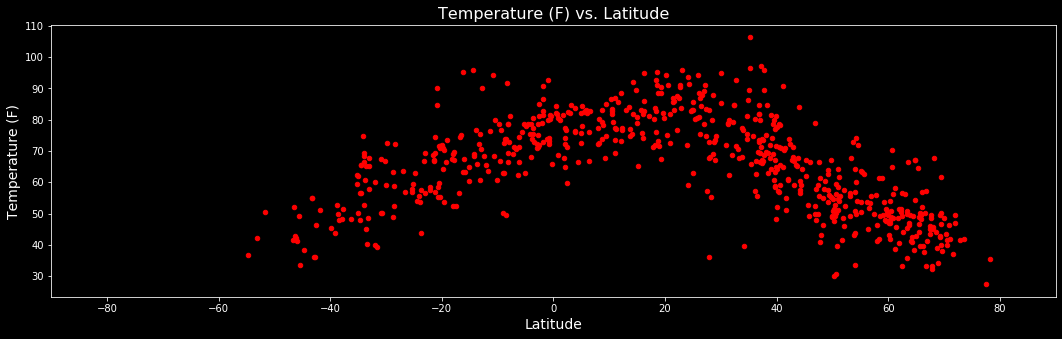

In [60]:
plt.style.use('dark_background')

plt.figure(figsize=(18,5))
plt.scatter(df_countries['Latitude'],df_countries['Temperature (F)'],color = 'red',s=20)
plt.title('Temperature (F) vs. Latitude',fontsize=(16));
plt.xlim(-90,90)
plt.ylabel('Temperature (F)',fontsize=(14));
plt.xlabel('Latitude',fontsize=(14));

In [50]:
df_countries_table.groupby(['Latitude'])['Humidity (%)'].mean().reset_index().style.background_gradient(cmap=cm)

,Latitude,Humidity (%)
0,"(-56.0, -29.0]",73.5424
1,"(-29.0, -14.0]",63.3276
2,"(-14.0, -3.0]",73.7288
3,"(-3.0, 9.0]",77.7414
4,"(9.0, 20.0]",73.7966
5,"(20.0, 32.0]",65.4655
6,"(32.0, 40.0]",63.0339
7,"(40.0, 48.0]",60.9828
8,"(48.0, 55.0]",75.3051
9,"(55.0, 64.0]",80.2414


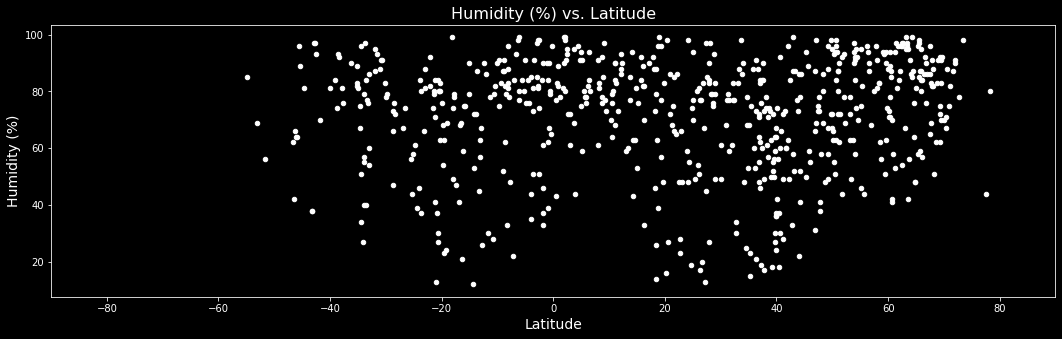

In [57]:
plt.figure(figsize=(18,5))
plt.scatter(df_countries['Latitude'],df_countries['Humidity (%)'],color = 'white',s=20);
plt.title('Humidity (%) vs. Latitude',fontsize=(16));
plt.xlim(-90,90)
plt.ylabel('Humidity (%)',fontsize=(14));
plt.xlabel('Latitude',fontsize=(14));

In [52]:
df_countries_table.groupby(['Latitude'])['Cloudiness (%)'].mean().reset_index().style.background_gradient(cmap=cm)

,Latitude,Cloudiness (%)
0,"(-56.0, -29.0]",48.1186
1,"(-29.0, -14.0]",40.6552
2,"(-14.0, -3.0]",53.3729
3,"(-3.0, 9.0]",68.9483
4,"(9.0, 20.0]",68.0847
5,"(20.0, 32.0]",50.2414
6,"(32.0, 40.0]",27.0339
7,"(40.0, 48.0]",50.069
8,"(48.0, 55.0]",69
9,"(55.0, 64.0]",67.0862


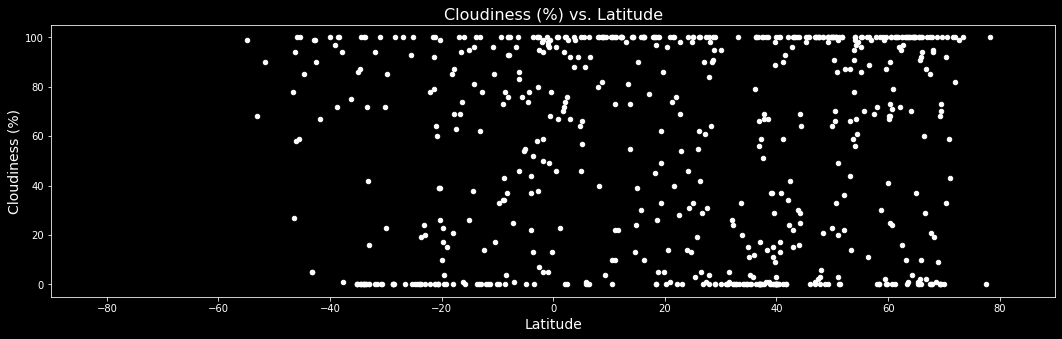

In [58]:
plt.figure(figsize=(18,5))
plt.scatter(df_countries['Latitude'],df_countries['Cloudiness (%)'],color = 'w',s=20);
plt.title('Cloudiness (%) vs. Latitude',fontsize=(16));
plt.xlim(-90,90)
plt.ylabel('Cloudiness (%)',fontsize=(14));
plt.xlabel('Latitude',fontsize=(14));

In [54]:
df_countries_table.groupby(['Latitude'])['Wind Speed (mph)'].mean().reset_index().style.background_gradient(cmap=cm)

,Latitude,Wind Speed (mph)
0,"(-56.0, -29.0]",9.81169
1,"(-29.0, -14.0]",10.3788
2,"(-14.0, -3.0]",9.99746
3,"(-3.0, 9.0]",7.16776
4,"(9.0, 20.0]",8.70898
5,"(20.0, 32.0]",9.42172
6,"(32.0, 40.0]",8.23136
7,"(40.0, 48.0]",10.8843
8,"(48.0, 55.0]",7.41814
9,"(55.0, 64.0]",7.58983


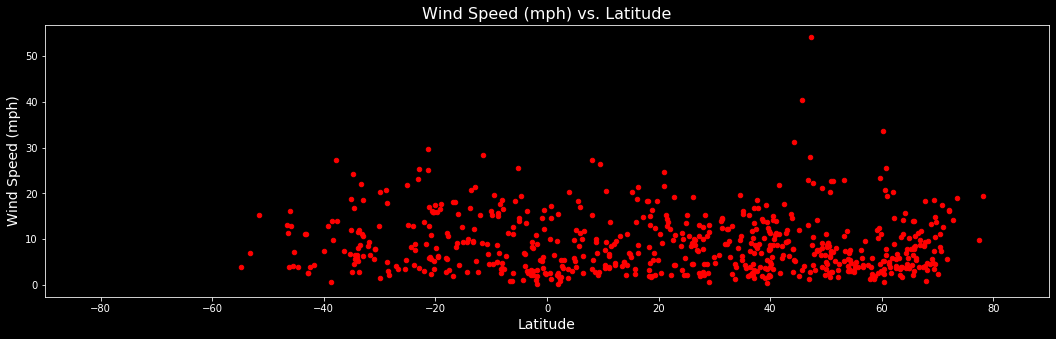

In [62]:
plt.figure(figsize=(18,5))
plt.scatter(df_countries['Latitude'],df_countries['Wind Speed (mph)'],color = 'red',s=20);
plt.xlim(-90,90)
plt.title('Wind Speed (mph) vs. Latitude',fontsize=(16));
plt.ylabel('Wind Speed (mph)',fontsize=(14));
plt.xlabel('Latitude',fontsize=(14));

In [61]:
print("Average wind speed is {} mph for all the randomly selected cities".format(df_countries['Wind Speed (mph)'].mean()))

Average wind speed is 8.94024844720498 mph for all the randomly selected cities


In [ ]:
# Observation 1: Temperatures are higher when near the equator (near 0 latitude), while temperatures drop when latitude increases or decreases.
# Observation 2: Cities at high latitudes and near the equator have higher percentages of humidity.
# Observation 3: Wind speed seems to be on average for majority of the cities. There are only a few that have high wind speeds, which seem to be outliers.